In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = '/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae_nrel_data.csv'


file_18 = '/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae nrel weather/nrel_uae_2018.csv'
file_19 = '/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae nrel weather/nrel_uae_2019.csv'
file_20 = '/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae nrel weather/nrel_uae_2020.csv'
file_21 = '/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae nrel weather/nrel_uae_2021.csv'
file_22 = '/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae nrel weather/nrel_uae_2022.csv'


In [50]:
# def remove_first_row(df):
#   df.columns = df.iloc[0]  
#   df = df[1:].reset_index(drop=True)
#   return df

In [51]:
files = [file_18, file_19, file_20, file_21, file_22]

dataframes1 = []

for file in files:
  df = pd.read_csv(file)
  # df = remove_first_row(df)
  # df = remove_first_row(df)
  dataframes1.append(df)

merged_data = pd.concat(dataframes1, ignore_index=True)

merged_data.to_csv(file_path, index=False)

In [52]:
merged = '/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae_nrel_data.csv'
df = pd.read_csv(merged)

In [53]:
df.head()

,Year,Month,Day,Hour,Minute,Solar Zenith Angle,Surface Albedo,Precipitable Water,Clearsky DHI,Clearsky DNI,...,Dew Point,Relative Humidity,Pressure,DHI,DNI,Fill Flag,GHI,Temperature,Wind Direction,Wind Speed
0,2018,1,1,0,30,177.61,0.01,2.3,0,0,...,15.6,68.88,1021,0,0,0,0,21.6,85,1.9
1,2018,1,1,1,30,164.82,0.01,2.3,0,0,...,15.2,68.05,1021,0,0,0,0,21.3,86,1.9
2,2018,1,1,2,30,151.24,0.01,2.3,0,0,...,14.8,67.17,1021,0,0,0,0,21.1,88,1.9
3,2018,1,1,3,30,137.71,0.01,2.2,0,0,...,14.4,66.85,1021,0,0,0,0,20.8,89,1.9
4,2018,1,1,4,30,124.34,0.01,1.2,0,0,...,13.7,67.08,1016,0,0,0,0,20.0,203,0.8


In [54]:
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])


In [55]:
columns_to_keep = ['Temperature', 'DNI', 'DHI', 'GHI', 'Pressure', 'Wind Speed', 'Datetime']

# Filter the dataset to keep only the desired columns
df = df[columns_to_keep]

In [56]:
df.to_csv(file_path, index=False)

In [57]:
merged = '/Users/yashwanthkaruparthi/Documents/Acads/sem7/design project/execution/data/uae_nrel_data.csv'
df = pd.read_csv(merged)

In [58]:
df.head()

,Temperature,DNI,DHI,GHI,Pressure,Wind Speed,Datetime
0,21.6,0,0,0,1021,1.9,2018-01-01 00:30:00
1,21.3,0,0,0,1021,1.9,2018-01-01 01:30:00
2,21.1,0,0,0,1021,1.9,2018-01-01 02:30:00
3,20.8,0,0,0,1021,1.9,2018-01-01 03:30:00
4,20.0,0,0,0,1016,0.8,2018-01-01 04:30:00


In [59]:
df = df.set_index('Datetime')

In [60]:
df.index = pd.to_datetime(df.index)


In [62]:
df.head()

,Temperature,DNI,DHI,GHI,Pressure,Wind Speed
Datetime,,,,,,
2018-01-01 00:30:00,21.6,0,0,0,1021,1.9
2018-01-01 01:30:00,21.3,0,0,0,1021,1.9
2018-01-01 02:30:00,21.1,0,0,0,1021,1.9
2018-01-01 03:30:00,20.8,0,0,0,1021,1.9
2018-01-01 04:30:00,20.0,0,0,0,1016,0.8


In [72]:
year = 2020
data_2022 = df[df.index.year == year]

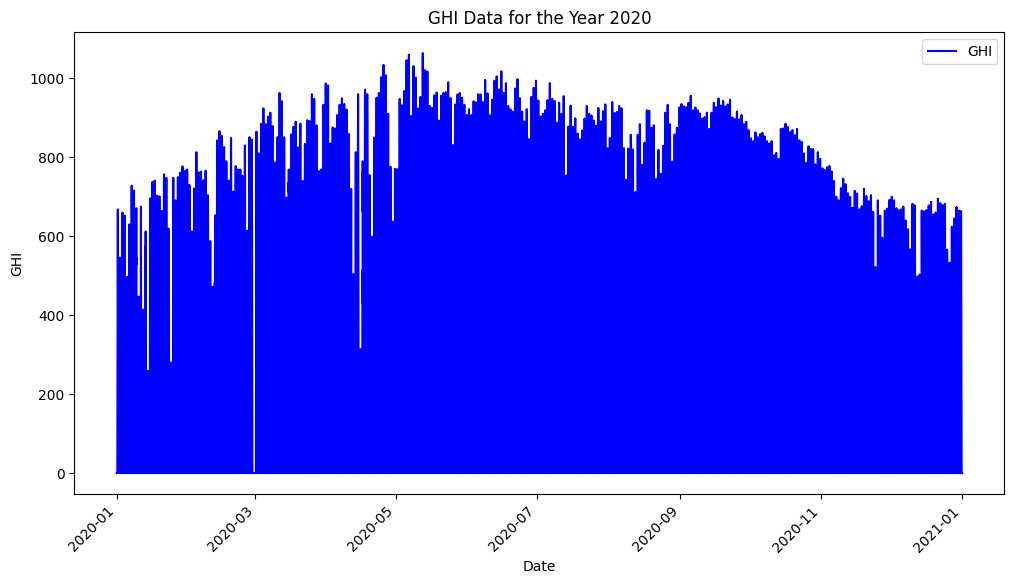

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(data_2022.index, data_2022['GHI'], label='GHI', color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.title(f'GHI Data for the Year {year}')
# plt.ylim(min(data['GHI']) - 10, max(data['GHI']) + 10)

plt.legend()
plt.show()

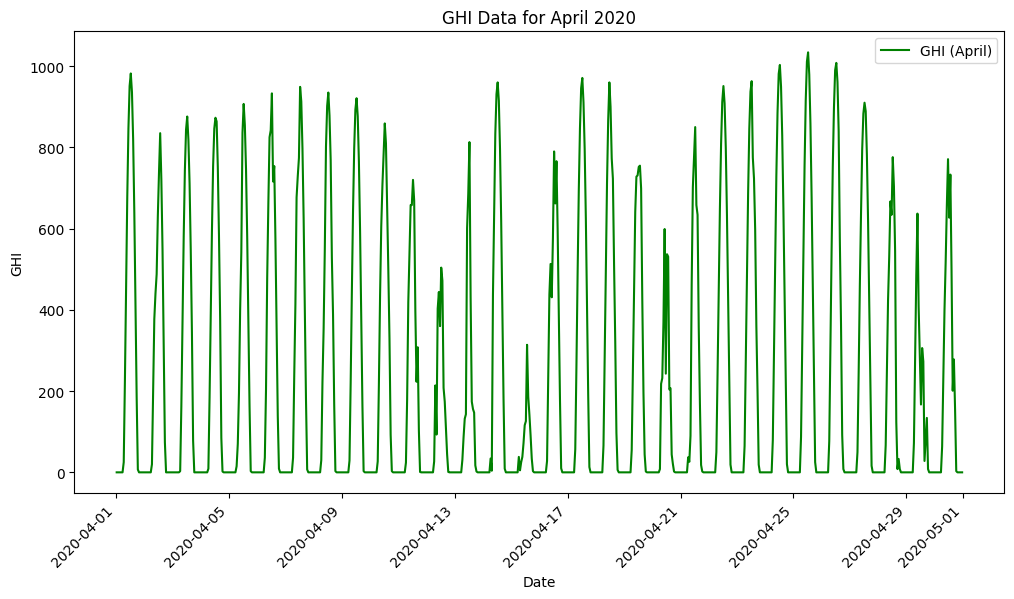

In [74]:
april_data_2022 = data_2022[data_2022.index.month == 4]

plt.figure(figsize=(12, 6))
plt.plot(april_data_2022.index, april_data_2022['GHI'], label='GHI (April)', color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.title(f'GHI Data for April {year}')
plt.legend()
plt.show()